In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import FastText

https://medium.com/@93Kryptonian/word-embedding-using-fasttext-62beb0209db9

## Read files

In [2]:
import os

path = "..//data//external//cadec//text"
files_list = os.listdir(path)
print(files_list)

['ARTHROTEC.1.txt', 'ARTHROTEC.10.txt', 'ARTHROTEC.100.txt', 'ARTHROTEC.101.txt', 'ARTHROTEC.102.txt', 'ARTHROTEC.103.txt', 'ARTHROTEC.104.txt', 'ARTHROTEC.105.txt', 'ARTHROTEC.106.txt', 'ARTHROTEC.107.txt', 'ARTHROTEC.108.txt', 'ARTHROTEC.109.txt', 'ARTHROTEC.11.txt', 'ARTHROTEC.110.txt', 'ARTHROTEC.111.txt', 'ARTHROTEC.112.txt', 'ARTHROTEC.113.txt', 'ARTHROTEC.114.txt', 'ARTHROTEC.115.txt', 'ARTHROTEC.116.txt', 'ARTHROTEC.117.txt', 'ARTHROTEC.118.txt', 'ARTHROTEC.119.txt', 'ARTHROTEC.12.txt', 'ARTHROTEC.120.txt', 'ARTHROTEC.121.txt', 'ARTHROTEC.122.txt', 'ARTHROTEC.123.txt', 'ARTHROTEC.124.txt', 'ARTHROTEC.125.txt', 'ARTHROTEC.126.txt', 'ARTHROTEC.127.txt', 'ARTHROTEC.128.txt', 'ARTHROTEC.129.txt', 'ARTHROTEC.13.txt', 'ARTHROTEC.130.txt', 'ARTHROTEC.131.txt', 'ARTHROTEC.132.txt', 'ARTHROTEC.133.txt', 'ARTHROTEC.134.txt', 'ARTHROTEC.135.txt', 'ARTHROTEC.136.txt', 'ARTHROTEC.137.txt', 'ARTHROTEC.138.txt', 'ARTHROTEC.139.txt', 'ARTHROTEC.14.txt', 'ARTHROTEC.140.txt', 'ARTHROTEC.141.txt'

In [3]:
corpus = []

for file_name in files_list:
    f = open(f'{path}//{file_name}')
    corpus.append(f.read())

corpus_df = pd.DataFrame(corpus)
corpus_df.columns = ['Txt']
corpus_df.head()

Txt
0  I feel a bit drowsy & have a little blurred vi...
1  Hunger pangs.\nBrilliant, I have a new lease o...
2  no side effects for the first two months .\nth...
3  1st pill taken with food, a few hours after i ...
4  I have had no side effects been taking Arthrot...

In [4]:
docs =  [word_tokenize(txt.lower()) for txt in corpus_df.Txt]

docs

[['i',
  'feel',
  'a',
  'bit',
  'drowsy',
  '&',
  'have',
  'a',
  'little',
  'blurred',
  'vision',
  ',',
  'so',
  'far',
  'no',
  'gastric',
  'problems',
  '.',
  'i',
  "'ve",
  'been',
  'on',
  'arthrotec',
  '50',
  'for',
  'over',
  '10',
  'years',
  'on',
  'and',
  'off',
  ',',
  'only',
  'taking',
  'it',
  'when',
  'i',
  'needed',
  'it',
  '.',
  'due',
  'to',
  'my',
  'arthritis',
  'getting',
  'progressively',
  'worse',
  ',',
  'to',
  'the',
  'point',
  'where',
  'i',
  'am',
  'in',
  'tears',
  'with',
  'the',
  'agony',
  ',',
  'gp',
  "'s",
  'started',
  'me',
  'on',
  '75',
  'twice',
  'a',
  'day',
  'and',
  'i',
  'have',
  'to',
  'take',
  'it',
  '.',
  'every',
  'day',
  'for',
  'the',
  'next',
  'month',
  'to',
  'see',
  'how',
  'i',
  'get',
  'on',
  ',',
  'here',
  'goes',
  '.',
  'so',
  'far',
  'its',
  'been',
  'very',
  'good',
  ',',
  'pains',
  'almost',
  'gone',
  ',',
  'but',
  'i',
  'feel',
  'a',
  'bit',

## Train the model

In [5]:
model = FastText(docs, 
                 vector_size=128, 
                 window=7, 
                 min_count = 3,
                 workers = 3,
                 sg=1, #sg=0: CBOW, sg=1: skipgram
                 epochs=10,
                 seed=379,
                 )

In [38]:
#model.save('..//models//cadec_corpus_01.ft')

## Examine the model

In [6]:
ftext = model.wv
print(len(ftext.index_to_key))
print(ftext.vector_size)

2510
128


In [7]:
ftext["knee"]

array([ 0.13830476, -0.20368323,  0.08573052, -0.02792413,  0.01777645,
       -0.0962923 , -0.17924808,  0.03552351,  0.3857545 ,  0.10975608,
       -0.12986593,  0.10471138,  0.01164238, -0.02836996,  0.16400829,
        0.34222496,  0.02640827,  0.02581706,  0.18877023,  0.17161784,
       -0.12536809, -0.09949675,  0.10194454,  0.40833414,  0.02157967,
       -0.1981772 ,  0.53446794, -0.19655472, -0.26391804, -0.03206195,
       -0.31634223, -0.3476067 , -0.3674777 , -0.04462172,  0.0810045 ,
       -0.12288665,  0.01372125, -0.03743114,  0.02978156,  0.25970337,
       -0.01561628,  0.15415376, -0.2503902 ,  0.01310305,  0.10504509,
        0.38620108,  0.13647781, -0.12264871,  0.26805118,  0.39748183,
       -0.23921409,  0.114078  , -0.06393396,  0.17218767, -0.16272269,
       -0.38459712,  0.11729366, -0.18136707, -0.28311482, -0.28399098,
        0.23081484,  0.03903729, -0.21532811, -0.5117511 , -0.0883638 ,
       -0.05039844,  0.14550139, -0.5220593 , -0.3095232 ,  0.10

In [8]:
ftext.similar_by_word("knee", topn=10)

[('elbow', 0.9106490612030029),
 ('knees', 0.8912527561187744),
 ('elbows', 0.8775149583816528),
 ('hip', 0.8767274022102356),
 ('ankle', 0.8572353720664978),
 ('hips', 0.8572096228599548),
 ('forearms', 0.8368850350379944),
 ('chronic', 0.8328045606613159),
 ('thighs', 0.8312751054763794),
 ('upper', 0.8294462561607361)]

## Import Docs_similarity class

In [9]:
# %run -i docs_similarity.ipynb
# import numpy as np

import nltk
nltk.download('punkt') #https://www.nltk.org/data.html

import numpy as np
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

def cosine(v1, v2):
    v1, v2 = np.array(v1), np.array(v2)
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    
def document_to_avg_embedding(doc, embeddings):
    
    doc_embeddings = []
    doc = str.lower(doc)
    tokens = word_tokenize(doc)

    for token in tokens:

        try:
            if token in embeddings.keys():
                doc_embeddings.append(embeddings[token])
        except AttributeError as e:
            if token in embeddings.key_to_index.keys():
                doc_embeddings.append(embeddings[token])
    
    avg_embedding = np.mean(np.array(doc_embeddings), axis=0)

    return avg_embedding
        
def cosine_sim_between_docs(doc1, doc2, embeddings, verbose=False):

    v1 = document_to_avg_embedding(doc1, embeddings)
    v2 = document_to_avg_embedding(doc2, embeddings)

    # If there is no embedings for a doc, return 0.0 (a != a returns true for NaNs).
    try: any(v1 != v1)
    except TypeError:
        if verbose: print(f'Warning cannot find embedding for {doc1}.')
        return 0.0
    
    try: any(v2 != v2)
    except TypeError:
        if verbose: print(f'Warning cannot find embedding for {doc2}.')
        return 0.0
    
    cosine_sim = cosine(v1, v2)


    if verbose:
        print(f'Cosine similarity between {doc1} and {doc2} is:\n{cosine_sim}\n')

    return cosine_sim
    
def calculate_similarity_matrix(cadec_sample, mapping):
    similarity_matrix = np.zeros((5,5))
    count_matrix = np.zeros((5,5))

    for index_i, row_i in cadec_sample.iterrows():
        for index_j, row_j in cadec_sample.iterrows():
            
            # Do not calculate simmilarities for the same entities
            # to not overestimate the score within the same group.
            if index_i != index_j:
                similarity_matrix[row_i.entity_type][row_j.entity_type] += cosine_sim_between_docs(row_i.text, row_j.text, mapping, verbose=False)
                count_matrix[row_i.entity_type][row_j.entity_type] += 1

    similarity_matrix /= count_matrix
    return similarity_matrix
    
def plot_similarity_matrix(similarity_matrix):
    
    plt.imshow(similarity_matrix, vmin=-1, vmax=1, extent=[0, 5, 0, 5]) 
    for i in range(5): 
        for j in range(5): 
            plt.annotate(str(round(similarity_matrix[i][j], 3)),
                        xy=(j+0.5, i+0.7), 
                        ha='center', va='center', color='white') 
            
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load data

In [10]:
path = "..//data//external//cadec//original"
dir_list = os.listdir(path)
len(dir_list)

1250

In [11]:
cadec_df = pd.concat((pd.read_csv(f'{path}//{f}', sep='\t', names=['tag_number', 'entity_type_offsets', 'text']) for f in dir_list), ignore_index=True)
cadec_df.entity_type_offsets = cadec_df.entity_type_offsets.str.split().str.get(0)      # Extract entity types from entity_type_offsets
cadec_df = cadec_df.rename(columns={"entity_type_offsets": "entity_type"})              # Rename column
cadec_df = cadec_df[ -cadec_df.tag_number.str.startswith('#')]                          # Remove annotation notes
cadec_df = cadec_df[['entity_type', 'text']]                                            # Leave only 'entity_type' and 'text' columns
cadec_df = cadec_df.reset_index(drop=True)                                              # Reset index
cadec_df

entity_type                           text
0            ADR                     bit drowsy
1            ADR          little blurred vision
2           Drug                      Arthrotec
3        Disease                      arthritis
4        Symptom                          agony
...          ...                            ...
9106     Symptom                     Lupus pain
9107     Symptom  pain from the herniated discs
9108     Finding                    disc issues
9109        Drug                         Zipsor
9110     Symptom                           pain

[9111 rows x 2 columns]

## Train, Test, Validation sets

In [83]:
import random

train = [word_tokenize(txt.lower()) for txt in corpus_df.Txt]
n=random.sample(range(0,len(train)),1000)
train = [train[i] for i in n]
train

[['insommnia',
  ',',
  'loss',
  'of',
  'dreaming',
  ',',
  'inability',
  'to',
  'visualize',
  ';',
  'muscle',
  'pain',
  ',',
  'weakness',
  ',',
  'atrophy',
  ';',
  'tendinitis',
  ',',
  'tendinopathy',
  ',',
  'tendon',
  'contracture',
  ';',
  'miniscus',
  'damage',
  ';',
  'working',
  'memory',
  'and',
  'short-term',
  'memory',
  'loss',
  ',',
  'language',
  'and',
  'learning',
  'ability',
  'loss',
  'including',
  'spoken',
  'and',
  'written',
  'aphasia',
  'and',
  'inability',
  'to',
  'read',
  ';',
  'gall',
  'bladder',
  'disease',
  ',',
  'pancreatitis',
  ',',
  'acid',
  'reflux',
  ';',
  'inability',
  'to',
  'walk',
  '.',
  'i',
  'kept',
  'taking',
  'myself',
  'off',
  'this',
  'drug',
  ',',
  'was',
  'told',
  'it',
  'could',
  'not',
  'be',
  'th',
  'e',
  'drug',
  ',',
  'urged',
  'to',
  'go',
  'back',
  'on',
  ',',
  'recovering',
  'somewhat',
  'each',
  'time',
  ',',
  'but',
  'finally',
  'the',
  'damage',
  'w

In [84]:
from sklearn.model_selection import train_test_split

foo, test = train_test_split(cadec_df, test_size=0.2, random_state=379, shuffle=True,)
foo, val = train_test_split(foo, test_size=0.2, random_state=379, shuffle=True,)

print(len(test))
print(len(val))

1823
1458


In [85]:
val_sample = val.groupby('entity_type').sample(n=20, random_state=379).reset_index(drop=True)
print(val_sample.head())
val_sample.entity_type.value_counts()

  entity_type         text
0         ADR   Joint pain
1         ADR         sick
2         ADR         pain
3         ADR    depressed
4         ADR  muscle pain


entity_type
ADR        20
Disease    20
Drug       20
Finding    20
Symptom    20
Name: count, dtype: int64

In [86]:
type_dict = {'ADR':0, 'Disease':1, 'Drug':2, 'Finding':3, 'Symptom':4}
val_sample.entity_type = val_sample.entity_type.map(type_dict)
val_sample

entity_type                                   text
0             0                             Joint pain
1             0                                   sick
2             0                                   pain
3             0                              depressed
4             0                            muscle pain
..          ...                                    ...
95            4  walking up the stairs was intolerable
96            4                              menopause
97            4                         arthritis pain
98            4                      knee inflammation
99            4                              knew pain

[100 rows x 2 columns]

In [87]:
test_sample = test.groupby('entity_type').sample(n=20, random_state=379).reset_index(drop=True)
print(test_sample.head())
test_sample.entity_type.value_counts()
test_sample.entity_type = test_sample.entity_type.map(type_dict)
test_sample

  entity_type                 text
0         ADR  severe pain in hips
1         ADR                 pain
2         ADR                 Pain
3         ADR    lower tendon pain
4         ADR        hurt to stand


entity_type                 text
0             0  severe pain in hips
1             0                 pain
2             0                 Pain
3             0    lower tendon pain
4             0        hurt to stand
..          ...                  ...
95            4                 pain
96            4            back pain
97            4                 pain
98            4                 pain
99            4             hobbling

[100 rows x 2 columns]

## Similarity matrix matric

In [68]:
similarity_matrix=[
    [0.65326867, 0.50436608, 0.54396547, 0.60149205, 0.68317299],
    [0.50436608, 0.49722514, 0.5039656,  0.51631858, 0.48195767],
    [0.54396547, 0.5039656,  0.67149904, 0.49680017, 0.54134704],
    [0.60149205, 0.51631858, 0.49680017, 0.55389526, 0.55522851],
    [0.68317299, 0.48195767, 0.54134704, 0.55522851, 0.71551195]
]

def similarity_matrix_metrics(similarity_matrix):
    sim_len = len(similarity_matrix)
    score = 0 #count difference between similarities
    count = 0 #count number of similarities that are less or equal to similaraity within the same class
    for i in range(sim_len):
        for j in range(sim_len):

            score += similarity_matrix[i][i] - similarity_matrix[i][j]
            if similarity_matrix[i][i]-similarity_matrix[i][j] >= 0:
                count += 1

    return score, count

similarity_matrix_metrics(similarity_matrix)


(1.5083719200000005, 19)

## Grid search

In [78]:
params = {
    "vector_size": [64, 128],
    "window": [3, 5, 7, 9, 11, 13],
    "min_count": [2, 3, 4, 5],
    "sg": [0]
}

In [79]:
for vector_size in params["vector_size"]:
    for window in params["window"]:
        for min_count in params["min_count"]:
            for sg in params["sg"]:
                
                model = FastText(train, 
                 vector_size=vector_size, 
                 window=window, 
                 min_count = min_count,
                 workers = 3,
                 sg=sg, #sg=0: CBOW, sg=1: skipgram
                 epochs=10,
                 seed=379,
                 )
                
                ft_mapping = model.wv

                similarity_matrix = calculate_similarity_matrix(val_sample, ft_mapping)
                score, count = similarity_matrix_metrics(similarity_matrix)

                print(f'{vector_size}_{window}_{min_count}_{sg}:\t{score:.4f}\t{count}')
                
                # model.save(f'..//models//cadec_corpus_01_{vector_size}_{window}_{min_count}_{sg}.ft')
            
        print('\n')
    print('\n')


64_3_2_0:	2.9492	21
64_3_3_0:	3.4788	21
64_3_4_0:	3.4345	21
64_3_5_0:	3.5228	19


64_5_2_0:	3.5384	22
64_5_3_0:	3.9984	22
64_5_4_0:	4.1263	21
64_5_5_0:	4.1804	19


64_7_2_0:	4.0476	22
64_7_3_0:	4.3478	22
64_7_4_0:	4.4046	21
64_7_5_0:	4.4870	19


64_9_2_0:	4.1387	22
64_9_3_0:	4.6723	23
64_9_4_0:	4.9676	21
64_9_5_0:	4.7715	21


64_11_2_0:	4.5499	23
64_11_3_0:	5.0658	23
64_11_4_0:	5.0367	21
64_11_5_0:	4.8439	21


64_13_2_0:	4.6711	23
64_13_3_0:	4.8984	23
64_13_4_0:	5.1961	21
64_13_5_0:	5.0663	22




128_3_2_0:	2.9243	21
128_3_3_0:	3.3606	22
128_3_4_0:	3.5455	21
128_3_5_0:	3.5467	19


128_5_2_0:	3.4155	22
128_5_3_0:	3.9046	22
128_5_4_0:	4.1370	21
128_5_5_0:	3.9825	19


128_7_2_0:	4.0306	22
128_7_3_0:	4.3009	22
128_7_4_0:	4.4926	21
128_7_5_0:	4.4576	19


128_9_2_0:	4.3248	23
128_9_3_0:	4.6252	24
128_9_4_0:	4.7939	22
128_9_5_0:	4.5834	20


128_11_2_0:	4.3660	23
128_11_3_0:	4.8735	24
128_11_4_0:	5.0605	22
128_11_5_0:	4.6192	21


128_13_2_0:	4.6745	23
128_13_3_0:	4.8615	23
128_13_4_0:	5.2279	2

## Model evaluation

In [ ]:
# Validation set results
# 64_11_3_0:  5.0658	23
# 128_11_3_0: 4.8735	24
# 128_13_4_0: 5.2279	22

### Fast text mapping 64_11_3_0

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


128_13_5_0:	3.8005	22


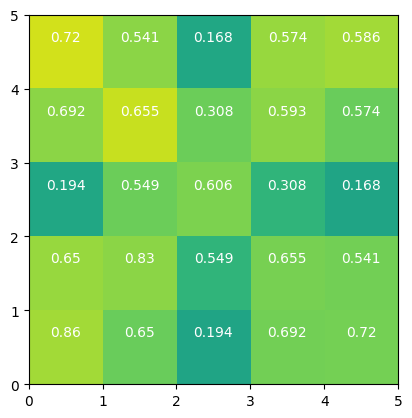

In [88]:
model = FastText(train, vector_size=64, window=11, min_count = 3, workers = 3, sg=0, epochs=10, seed=379,)
ft_mapping = model.wv
similarity_matrix = calculate_similarity_matrix(test_sample, ft_mapping)
score, count = similarity_matrix_metrics(similarity_matrix)

print(f'{vector_size}_{window}_{min_count}_{sg}:\t{score:.4f}\t{count}')
plot_similarity_matrix(similarity_matrix)

### Fast text mapping 128_11_3_0

128_13_5_0:	3.5299	22


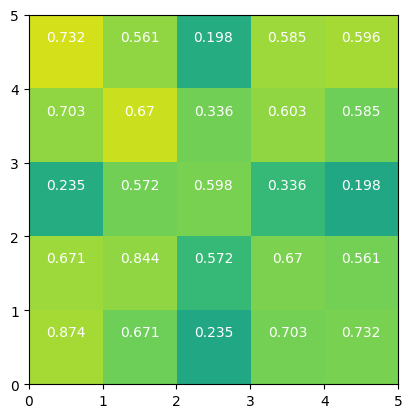

In [89]:
model = FastText(train, vector_size=128, window=11, min_count = 3, workers = 3, sg=0, epochs=10, seed=379,)
ft_mapping = model.wv
similarity_matrix = calculate_similarity_matrix(test_sample, ft_mapping)
score, count = similarity_matrix_metrics(similarity_matrix)

print(f'{vector_size}_{window}_{min_count}_{sg}:\t{score:.4f}\t{count}')
plot_similarity_matrix(similarity_matrix)

### Fast text mapping 128_13_4_0

128_13_5_0:	3.8704	21


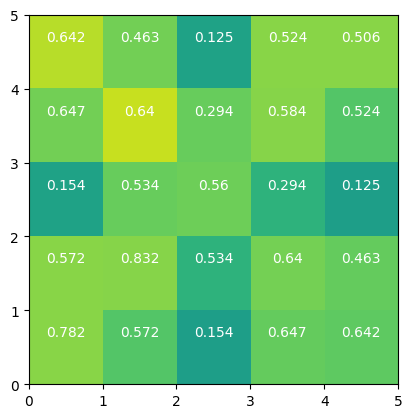

In [90]:
model = FastText(train, vector_size=128, window=13, min_count = 4, workers = 3, sg=0, epochs=10, seed=379,)
ft_mapping = model.wv
similarity_matrix = calculate_similarity_matrix(test_sample, ft_mapping)
score, count = similarity_matrix_metrics(similarity_matrix)

print(f'{vector_size}_{window}_{min_count}_{sg}:\t{score:.4f}\t{count}')
plot_similarity_matrix(similarity_matrix)

### Glove mapping

In [91]:
def load_embeddings(path):
    mapping = dict()
    
    with open(path, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if len(line) == 0:
                continue
            splitted = line.split(" ")
            mapping[splitted[0]] = np.array(splitted[1:], dtype=float)
    return mapping

glove_mapping = load_embeddings('..\data\external\glove.6B.50d.txt')

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_4148\201775698.py:13: SyntaxWarning: invalid escape sequence '\d'
  glove_mapping = load_embeddings('..\data\external\glove.6B.50d.txt')


128_13_5_0:	2.9283	22


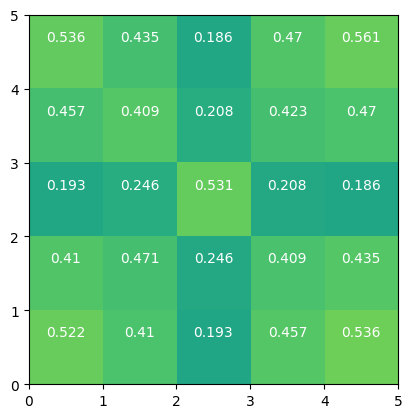

In [92]:
similarity_matrix = calculate_similarity_matrix(test_sample, glove_mapping)
score, count = similarity_matrix_metrics(similarity_matrix)

print(f'{vector_size}_{window}_{min_count}_{sg}:\t{score:.4f}\t{count}')
plot_similarity_matrix(similarity_matrix)